In [1]:
import numpy as np
import mne # docu: https://mne.tools/stable/overview/index.html
import pandas as pd
import matplotlib.pyplot as plt
import glob
import mne_connectivity as mne_connect
from autoreject import get_rejection_threshold

%matplotlib widget

Opening raw data file ../data_ukazka/sub-S01/filtered-S01-raw.fif...
    Range : 0 ... 1482441 =      0.000 ...  1022.373 secs
Ready.
Using matplotlib as 2D backend.


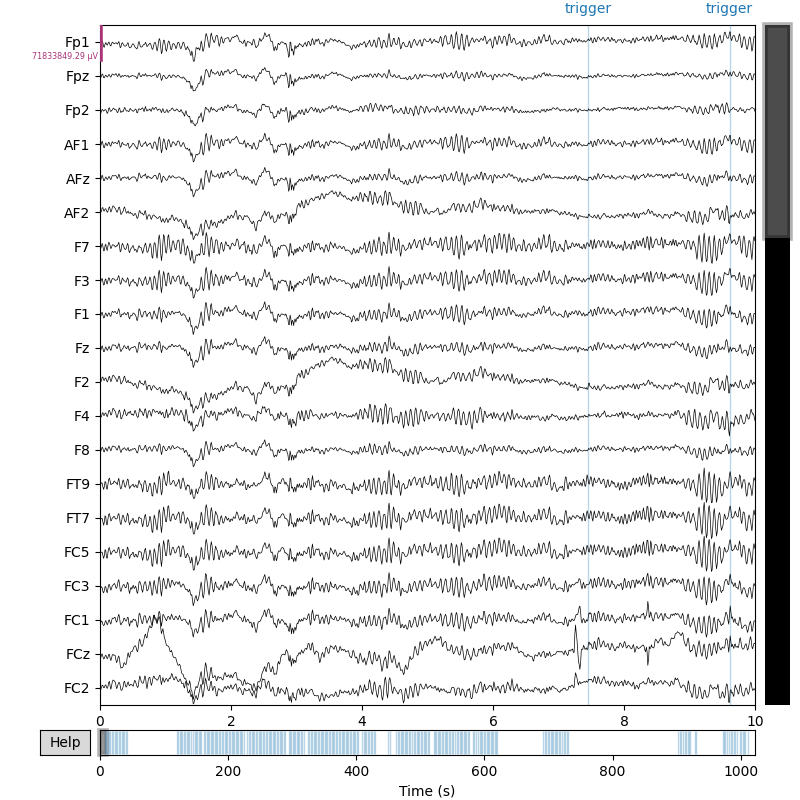

In [2]:
raw_filtered = mne.io.read_raw_fif('../data_ukazka/sub-S01/filtered-S01-raw.fif')
raw_filtered.plot(scalings='auto');

In [3]:
events, event_dict = mne.events_from_annotations(raw_filtered)

Used Annotations descriptions: ['trigger']


In [4]:
# Epoching settings
tmin =  -.200  # start of each epoch (in sec)
tmax =  1.000  # end of each epoch (in sec)
baseline = (None, 0)

# Create epochs
epochs = mne.Epochs(raw_filtered,
                    events, event_dict,
                    tmin, tmax,
                    baseline=baseline, 
                    preload=True) 

Not setting metadata
267 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 267 events and 1741 original time points ...
0 bad epochs dropped


In [5]:
epochs

Number of events,267
Events,trigger: 267
Time range,-0.200 – 1.000 s
Baseline,-0.200 – 0.000 s


In [6]:
epochs[0]

Number of events,1
Events,trigger: 1
Time range,-0.200 – 1.000 s
Baseline,-0.200 – 0.000 s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


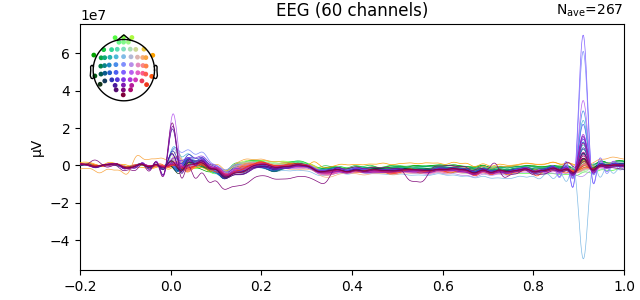

In [7]:
epochs.average().plot(spatial_colors=True); # before removing ICs, so that we can compare with post-ICA below to see the effect of artifact removal

In [16]:
# connectivity = mne_connect.EpochConnectivity(data,data.shape[0],n_epochs_used=16)
# tohle je úplná blbost, musím použít nějakou funkci, která vyrobí EpochConnectivity
# proto nefunguje connectivity.get_data()

In [21]:
env_corr = mne_connect.envelope_correlation(epochs.get_data())
env_corr

<EpochTemporalConnectivity | n_epochs : 267, time : [0.000000, 0.000000], , nave : 267, nodes, n_estimated : 64, 2080, ~4.2 MB>

In [27]:
data_corr = env_corr.get_data()
data_corr.shape

(267, 64, 64, 1)

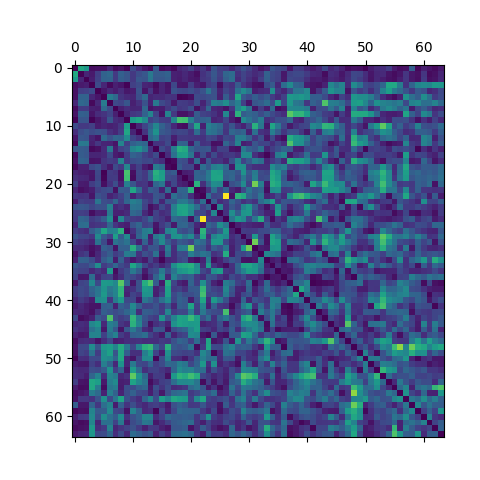

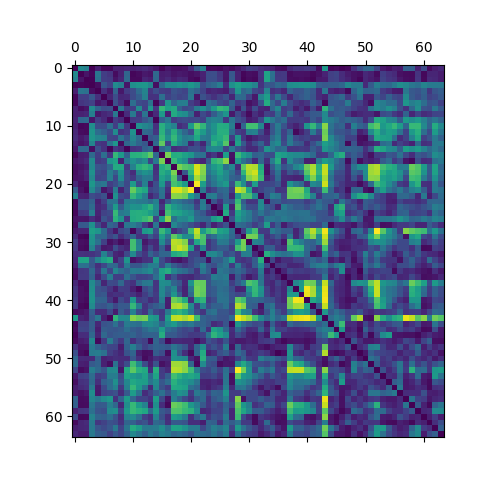

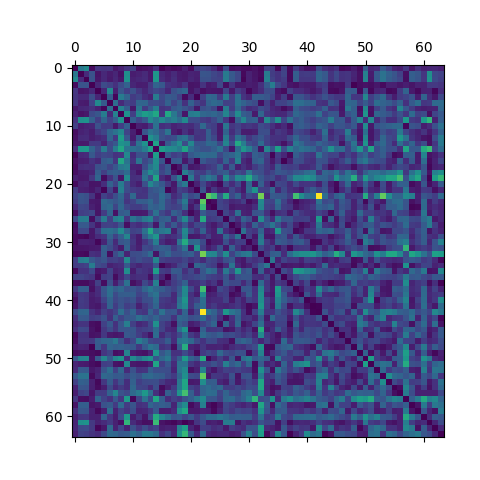

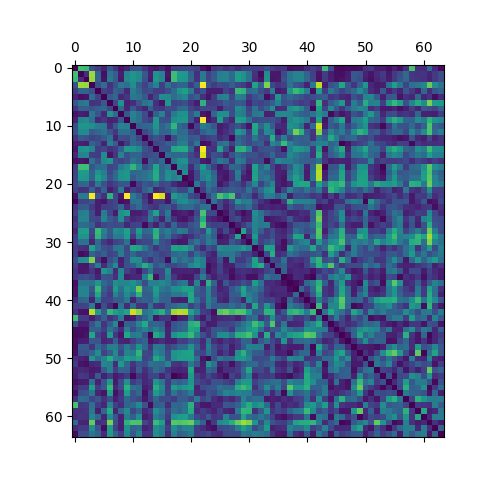

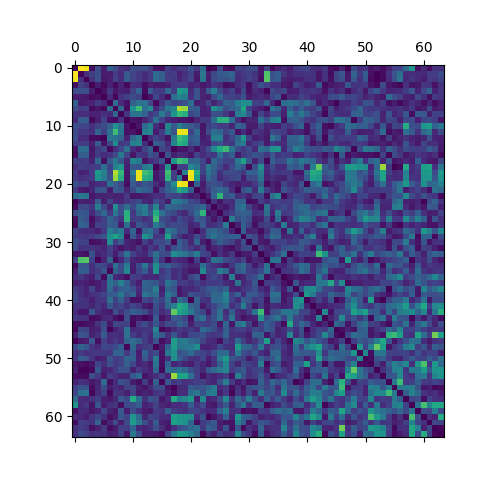

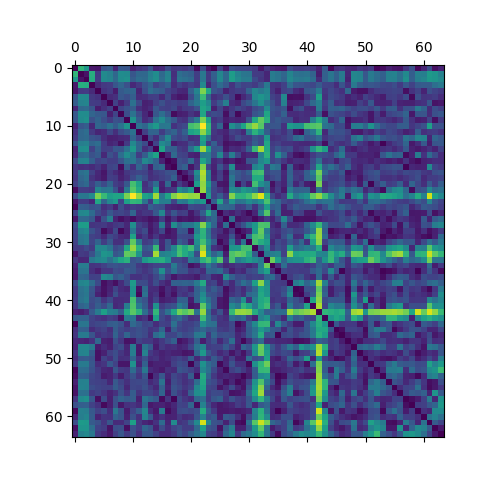

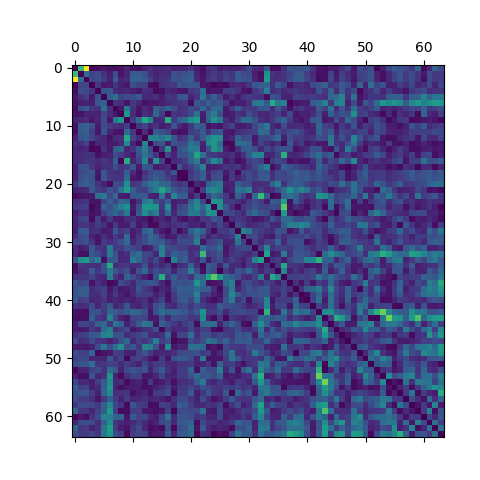

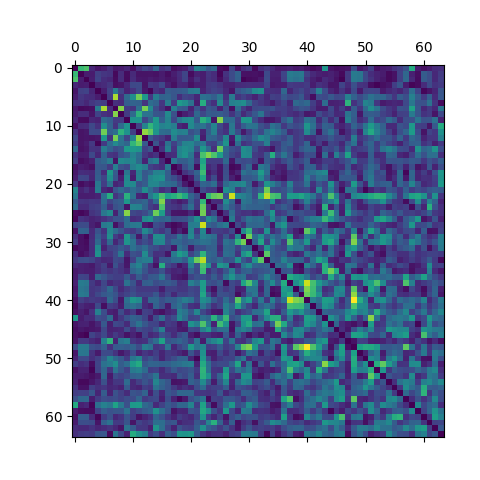

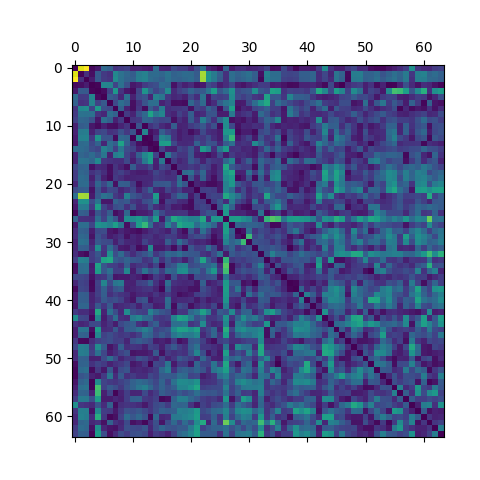

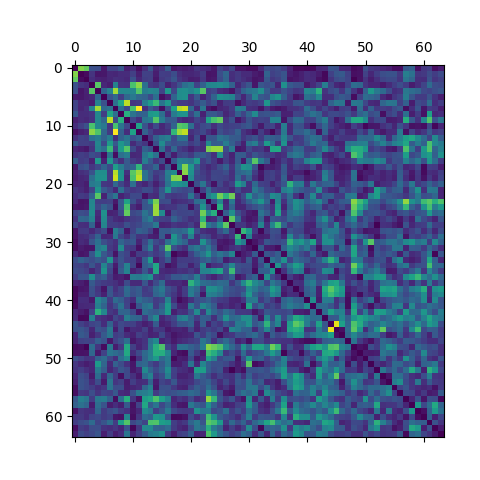

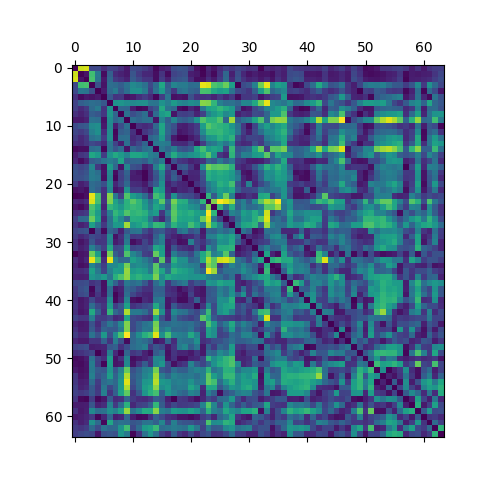

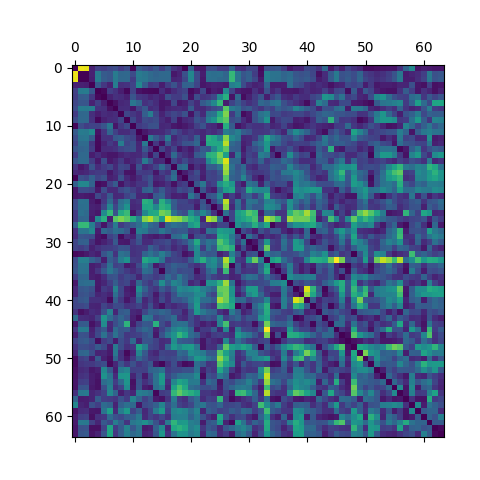

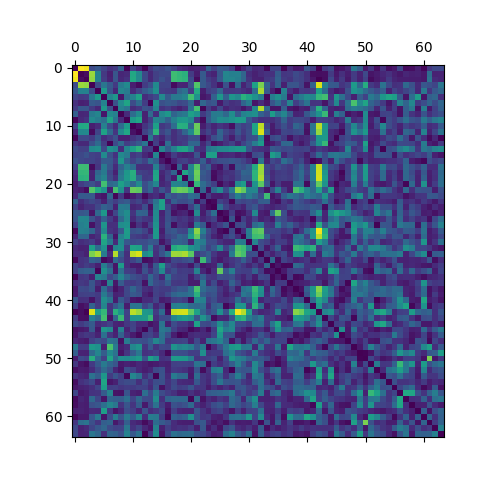

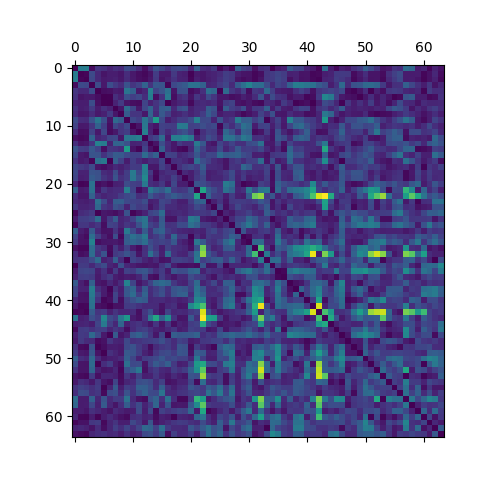

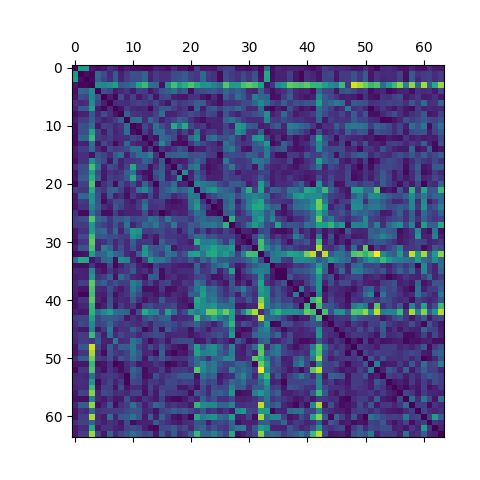

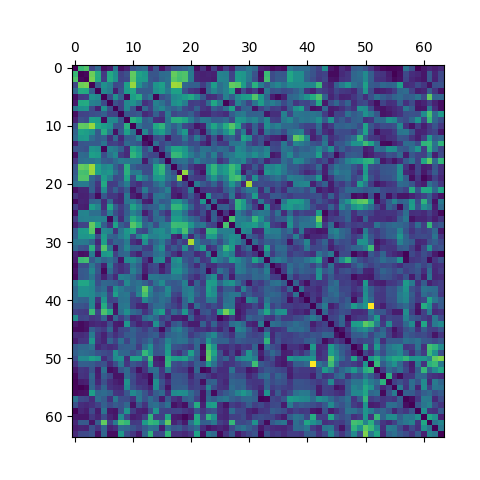

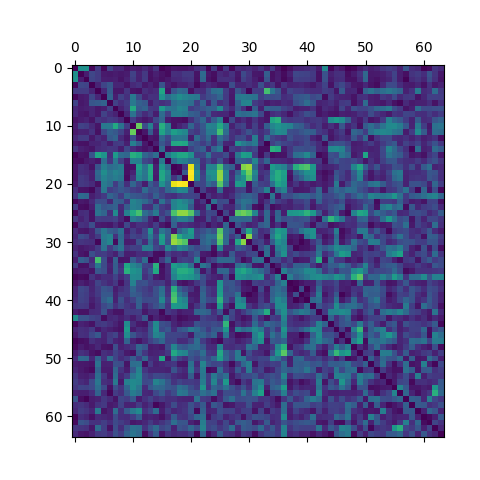

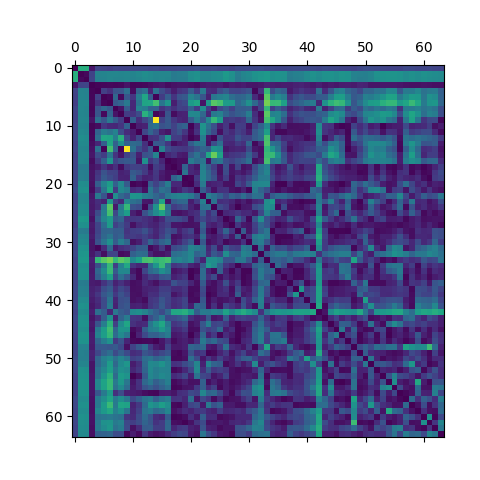

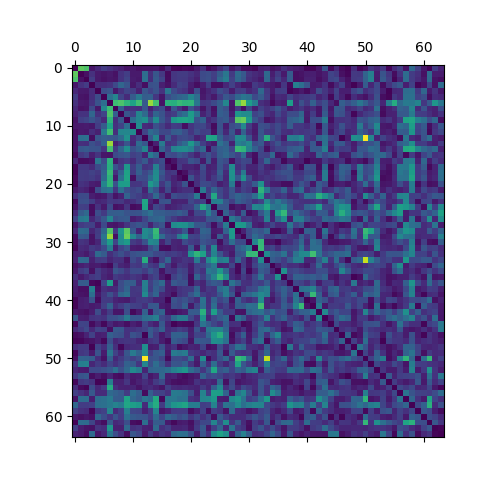

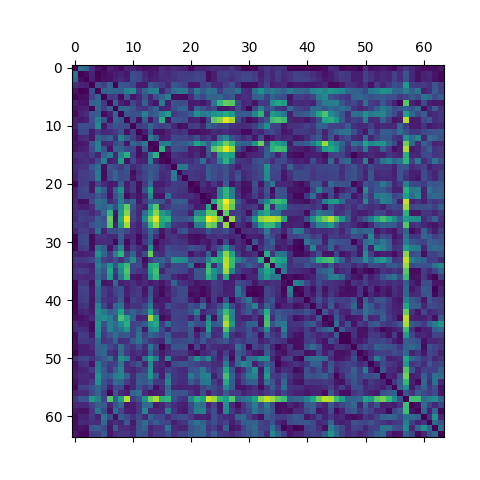

In [42]:
# TODO dává tohle smysl? 
for i in range(0,200,10):
    plt.matshow(data_corr[i])
